<a href="https://colab.research.google.com/github/asetya/BigData/blob/master/Sound_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/EthnicSound/audio.zip /content/ 

In [130]:
!unzip /content/audio.zip

Archive:  /content/audio.zip
replace audio/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: audio/.DS_Store         
  inflating: audio/10001-0-0-0.wav   
  inflating: audio/10001-0-0-1.wav   
  inflating: audio/10001-0-0-2.wav   
  inflating: audio/10001-0-0-3.wav   
  inflating: audio/10001-0-0-4.wav   
  inflating: audio/10001-0-0-5.wav   
  inflating: audio/10001-0-0-6.wav   
  inflating: audio/10001-0-0-7.wav   
  inflating: audio/10001-0-0-8.wav   
  inflating: audio/10002-1-0-1.wav   
  inflating: audio/10002-1-0-10.wav  
  inflating: audio/10002-1-0-2.wav   
  inflating: audio/10002-1-0-3.wav   
  inflating: audio/10002-1-0-4.wav   
  inflating: audio/10002-1-0-5.wav   
  inflating: audio/10002-1-0-6.wav   
  inflating: audio/10002-1-0-7.wav   
  inflating: audio/10002-1-0-8.wav   
  inflating: audio/10002-1-0-9.wav   
  inflating: audio/10003-2-0-1.wav   
  inflating: audio/10003-2-0-2.wav   
  inflating: audio/10003-2-0-3.wav   
  inflating: audio/10003-2-0-4.w

In [ ]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np
filename = '/audio/dog_bark_1.wav' 
#filename = '../EthnicSound Dataset sample/audio/dog_bark_1.wav'

#import librosa    
#y, s = librosa.load('test.wav', sr=8000)
librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename,'r') 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

In [ ]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -32768 to 32261
Librosa audio file min~max range: -1.0626788 to 1.059092


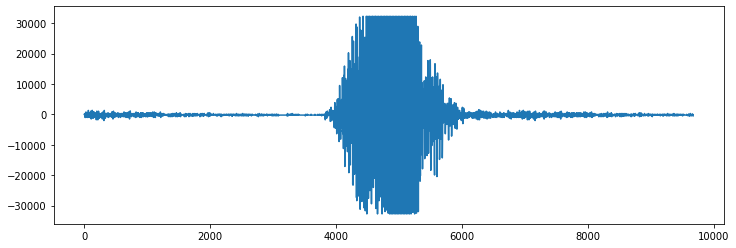

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 38)


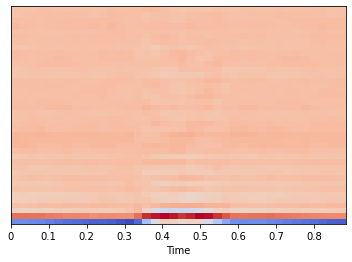

In [ ]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')


In [ ]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

Upload Excel file 

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving gamel.csv to gamel (1).csv


In [ ]:
# Load various imports 
import pandas as pd
import os

import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'audio'

metadata = pd.read_csv(io.BytesIO(uploaded['gamel.csv']))

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    #file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["slice_file_name"]))
    #print(file_name)
    
    class_label = row["class_name"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

NameError: ignored

In [ ]:
featuresdf

,feature,class_label
0,None,Angklung
1,None,Angklung
2,None,Angklung
3,None,Angklung
4,None,Angklung
...,...,...
57,None,Suling
58,None,Suling
59,None,Suling
60,None,Suling


In [ ]:
from sklearn.preprocessing import LabelEncoder
#from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()

In [ ]:
from tensorflow.keras.utils import to_categorical

yy = to_categorical(le.fit_transform(y)) 

In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [ ]:
%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


In [ ]:
%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [ ]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
2/2 [==============================] - 1s 111ms/step - loss: 91.9996 - accuracy: 0.1020 - val_loss: 20.6487 - val_accuracy: 0.1538

Epoch 00001: val_loss improved from inf to 20.64870, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 2/100
2/2 [==============================] - 0s 44ms/step - loss: 62.8245 - accuracy: 0.1224 - val_loss: 25.1930 - val_accuracy: 0.1538

Epoch 00002: val_loss did not improve from 20.64870
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 59.4802 - accuracy: 0.0816 - val_loss: 32.5725 - val_accuracy: 0.0769

Epoch 00003: val_loss did not improve from 20.64870
Epoch 4/100
2/2 [==============================] - 0s 45ms/step - loss: 55.5091 - accuracy: 0.1020 - val_loss: 30.4937 - val_accuracy: 0.0769

Epoch 00004: val_loss did not improve from 20.64870
Epoch 5/100
2/2 [==============================] - 0s 46ms/step - loss: 44.6119 - accuracy: 0.1224 - val_loss: 22.9055 - val_accuracy: 0.1538

Epoch 00005: val_l

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9387755393981934
Testing Accuracy:  0.692307710647583


In [ ]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])


In [ ]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [ ]:
# Class: saron

filename = 'audio/10008-7-0-1.wav' 
print_prediction(filename) 

The predicted class is: Suling 

Angklung 		 :  0.00054613244719803333282470703125
Bonang 		 :  0.02491139806807041168212890625000
Demung 		 :  0.00123442756012082099914550781250
Gong 		 :  0.00323693593963980674743652343750
Kendang 		 :  0.00000055901182349771261215209961
Rebab 		 :  0.00021978063159622251987457275391
Saron 		 :  0.03226407989859580993652343750000
Suling 		 :  0.93758672475814819335937500000000


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


**mODEL rEFINEMENT**

In [ ]:
import numpy as np
max_pad_len = 174

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [ ]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
#fulldatasetpath = '/Volumes/Untitled/ML_Data/Urban Sound/UrbanSound8K/audio/'

#metadata = pd.read_csv('../UrbanSound Dataset sample/metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["slice_file_name"]))
    
    class_label = row["class_name"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Error encountered while parsing file:  /content/audio/10001-0-0-0.wav
Error encountered while parsing file:  /content/audio/10001-0-0-1.wav
Error encountered while parsing file:  /content/audio/10001-0-0-2.wav
Error encountered while parsing file:  /content/audio/10001-0-0-3.wav
Error encountered while parsing file:  /content/audio/10001-0-0-4.wav
Error encountered while parsing file:  /content/audio/10001-0-0-5.wav
Error encountered while parsing file:  /content/audio/10001-0-0-6.wav
Error encountered while parsing file:  /content/audio/10001-0-0-7.wav
Error encountered while parsing file:  /content/audio/10002-1-0-1.wav
Error encountered while parsing file:  /content/audio/10002-1-0-2.wav
Error encountered while parsing file:  /content/audio/10002-1-0-3.wav
Error encountered while parsing file:  /content/audio/10002-1-0-4.wav
Error encountered while parsing file:  /content/audio/10002-1-0-5.wav
Error encountered while parsing file:  /content/audio/10002-1-0-6.wav
Error encountered wh

KeyboardInterrupt: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [ ]:
%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le

In [ ]:
featuresdf

,feature,class_label
0,None,Angklung
1,None,Angklung
2,None,Angklung
3,None,Angklung
4,None,Angklung
...,...,...
57,None,Suling
58,None,Suling
59,None,Suling
60,None,Suling


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 49
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

ValueError: ignored